<a href="https://colab.research.google.com/github/Idanleyb/Classification_Loans-/blob/main/Loans_Qualification_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loans Qualification Automation **
Goal  : Create automated tool for loans qualification process by the given data.


# Introduction

Last time most banks systems seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. Development of ML models that can help banks predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not

Link to Dataset: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?select=loan-train.csv

# Importing liabries and expolorate the data

In [141]:
# Imports relevant modules
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#general tools
import numpy as np
import pandas as pd
import scipy as sp
from numpy import mean

#SKL
from sklearn.preprocessing import LabelEncoder

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score ,StratifiedShuffleSplit, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import make_scorer, fbeta_score, matthews_corrcoef, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [115]:
def csv_drive_path_generatoer(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

In [143]:
path = csv_drive_path_generatoer('https://docs.google.com/spreadsheets/d/1MuBSH5EDU1g4LgVFl9peoG8ESOWEr1Ph4UsMZAZ2yt8/edit?usp=sharing')
loans = pd.read_csv('loan-train.csv')
# loans = pd.read_csv(path)
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Key Information**

Loan_ID--------------> Unique Loan ID

Gender --------------> Male/ Female

Married --------------> Applicant married (Y/N)

Dependents ------------> Number of dependents

Education -------------> Applicant Education (Graduate/ Under Graduate)

Self_Employed ---------> Self-employed (Y/N)

ApplicantIncome -------> Applicant income

CoapplicantIncome -----> Coapplicant income

LoanAmount -----------> Loan amount in thousands

Loan_Amount_Term ------> Term of a loan in months

Credit_History --------> Credit history meets guidelines

Property_Area ---------> Urban/ Semi-Urban/ Rural

Loan_Status -----------> Loan approved (Y/N)


In [144]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [145]:
loans.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [146]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        feature = pd.DataFrame(df[feature_name])
        feature.apply(pd.value_counts).plot.pie(subplots=True)

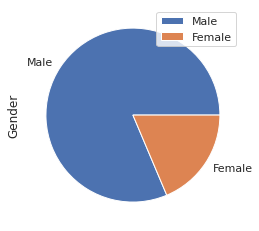

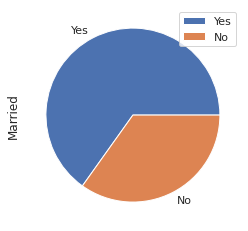

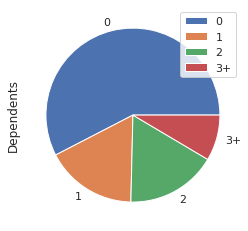

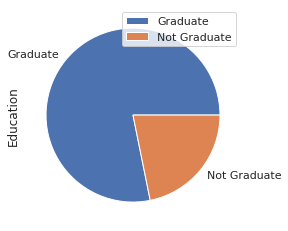

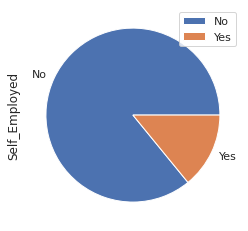

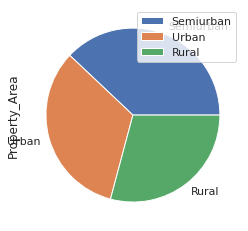

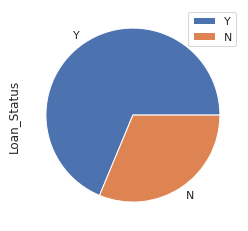

In [147]:
for featureName in loans.columns[1:]: #ignoring loanId
    explore_object_type(loans, str(featureName))

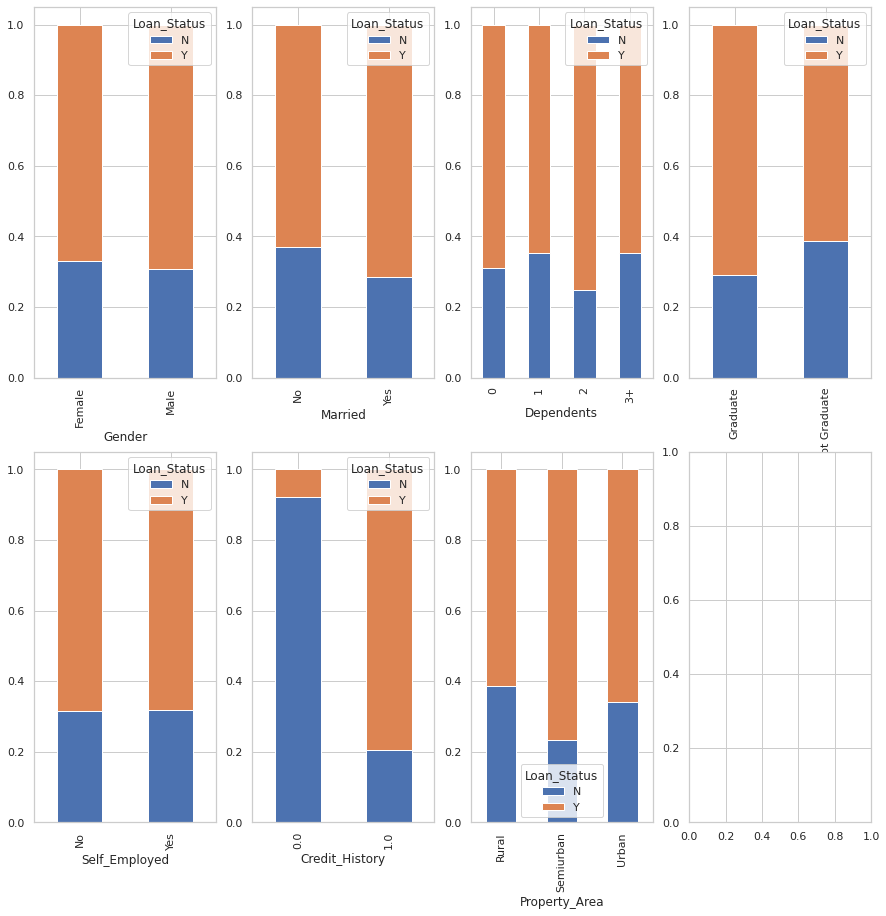

In [148]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(loans['Gender'],loans['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(loans['Married'],loans['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(loans['Dependents'],loans['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(loans['Education'],loans['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(loans['Self_Employed'],loans['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(loans['Credit_History'],loans['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Property_Area = pd.crosstab(loans['Property_Area'],loans['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,2])

In [149]:
loans.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Preproccessing the data

As we can see here, there are many columns with missing data so we use median and mode to replace with NaN values.

In [150]:
loans['Credit_History'].fillna(loans['Credit_History'].median(), inplace=True) # Median
loans['LoanAmount'].fillna(loans['LoanAmount'].median(), inplace=True) #mean


Loan_Status feature boolean values, So we replace Y values with 1 and N values with 0 and same for other Boolean types of columns,"Male": 1, "Female" : 0
After replacing we will use mean amd mode to replace with NaN values.

In [151]:
loans.Loan_Status = loans.Loan_Status.replace({"Y": 1, "N" : 0})
loans.Gender = loans.Gender.replace({"Male": 1, "Female" : 0})
loans.Married = loans.Married.replace({"Yes": 1, "No" : 0})
loans.Self_Employed = loans.Self_Employed.replace({"Yes": 1, "No" : 0})


In [152]:
loans['Gender'].fillna(loans['Gender'].mode()[0.0], inplace=True)
loans['Married'].fillna(loans['Married'].mode()[0.0], inplace=True)
loans['Self_Employed'].fillna(loans['Self_Employed'].mode()[0.0], inplace=True)
loans['Credit_History'].fillna(loans['Credit_History'].median(), inplace=True)
loans['Loan_Amount_Term'].fillna((loans['Loan_Amount_Term'].median()),inplace=True)


Here, Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

In [153]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loans[col] = le.fit_transform(loans[col])
    

In [154]:
#change format some columns
loans['Gender']=loans['Gender'].astype(int)
loans['Married']=loans['Married'].astype(int)
loans['Self_Employed']=loans['Self_Employed'].astype(int)

In [155]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


Finally, We have all the features with numerical values,and no missing data

In [156]:
loans.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Visualization**

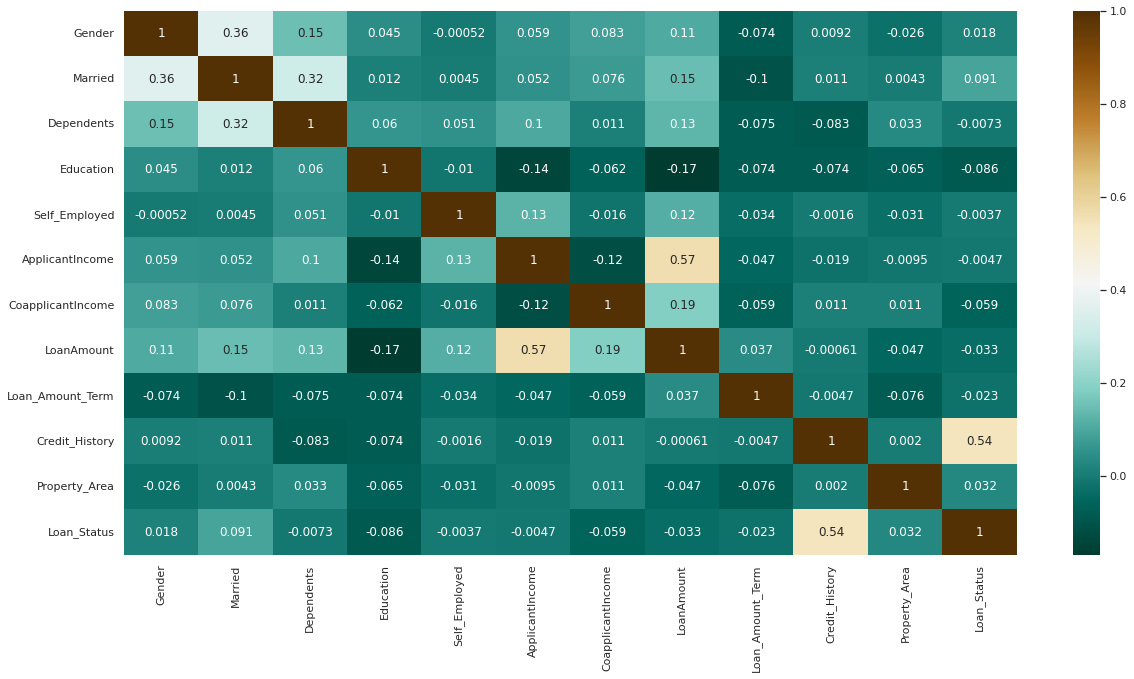

In [158]:
## **Plot Correlations**
corr_matrix=loans.corr()
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

In this heatmap, we can clearly seen the relation between two variables (Loan Status and Credit History)

In [159]:
count_male= len(loans[loans.Gender == 1])
count_female= len(loans[loans.Gender == 0])

print('The precentage of male from the data is 'f'{(count_male / len(loans.Gender))*100 :.2f}'"%")
print('The precentage of female from the data is 'f'{(count_female / len(loans.Gender))*100 :.2f}'"%")


The precentage of male from the data is 81.76%
The precentage of female from the data is 18.24%


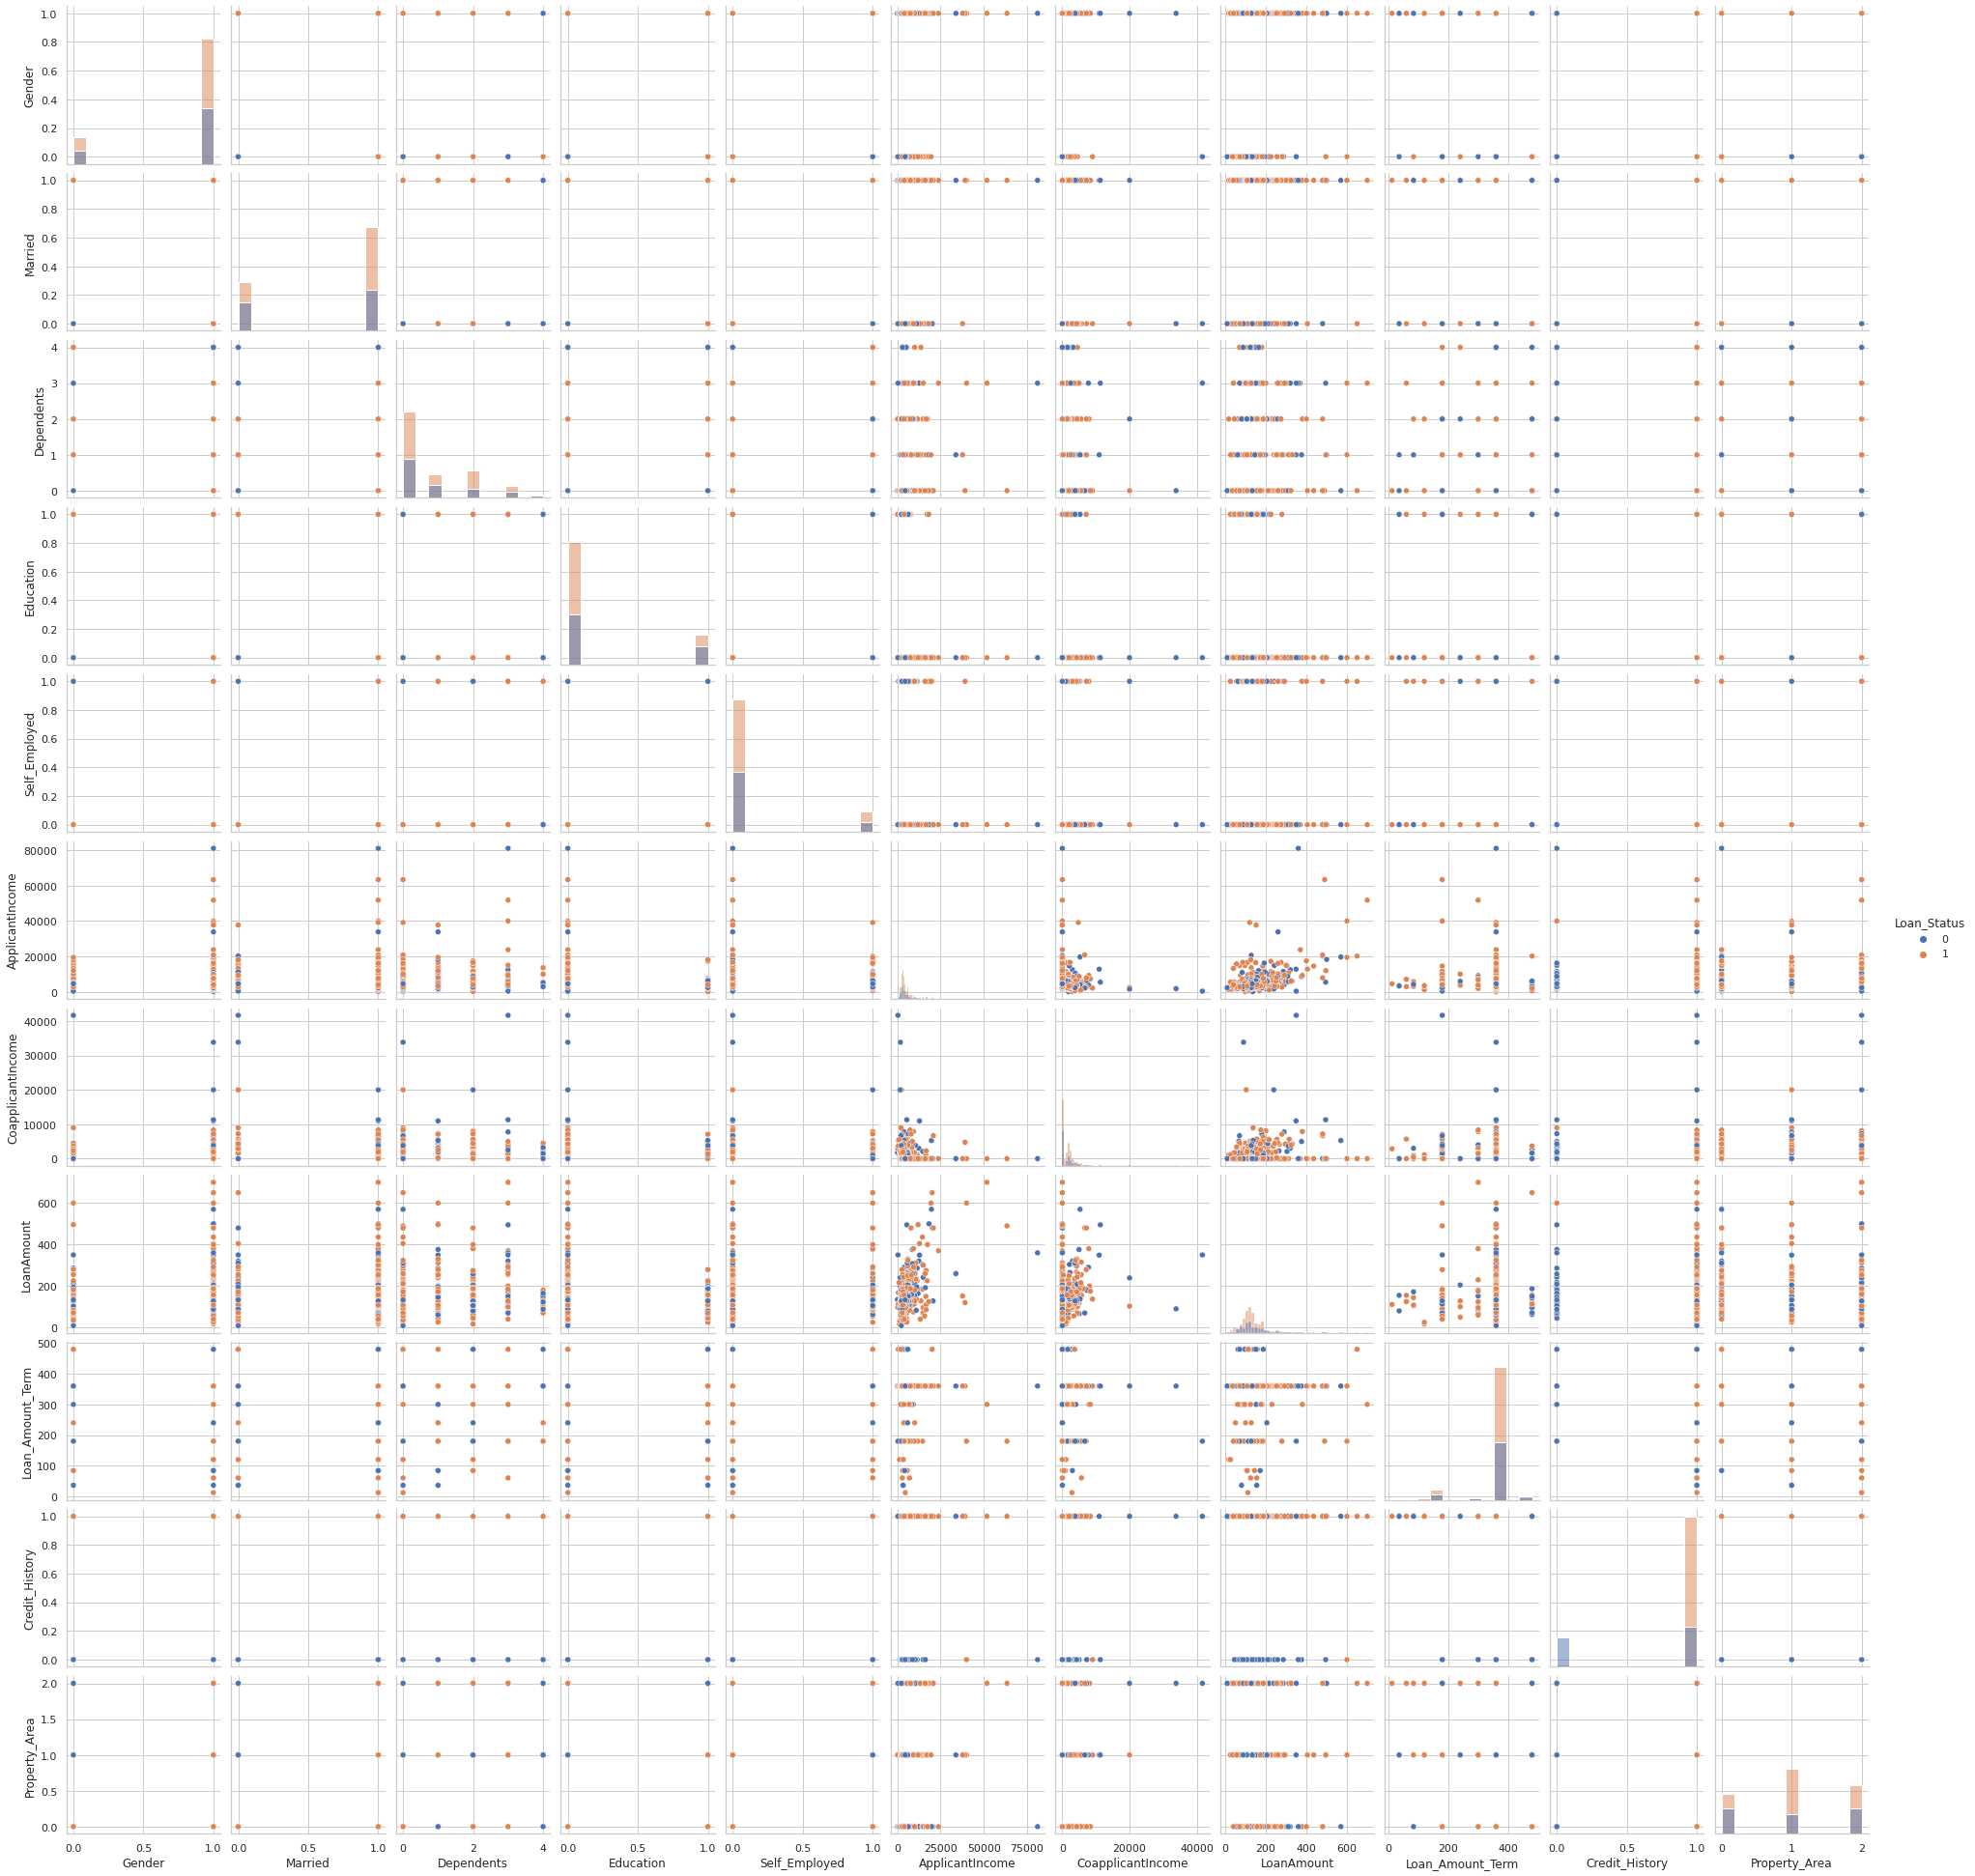

In [132]:
sns.pairplot(loans, hue="Loan_Status", diag_kind="hist")

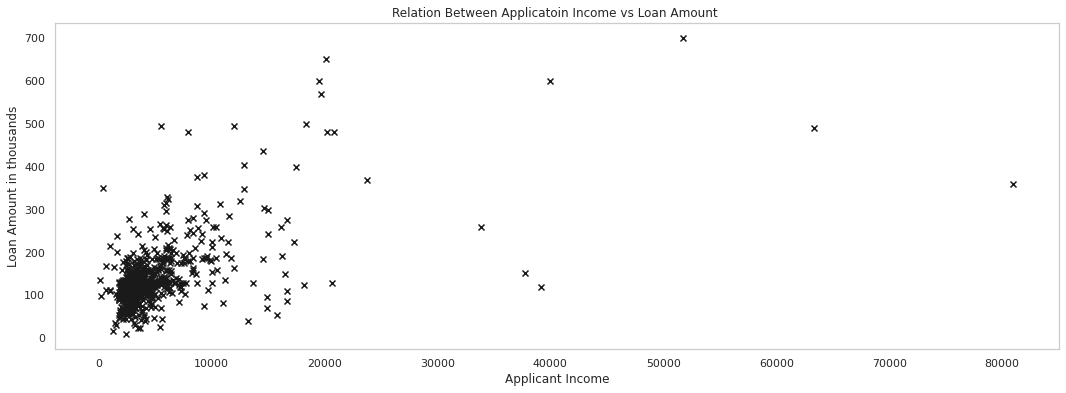

In [160]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loans['ApplicantIncome'] , loans['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount in thousands")
plt.show()

Histogram Distribution

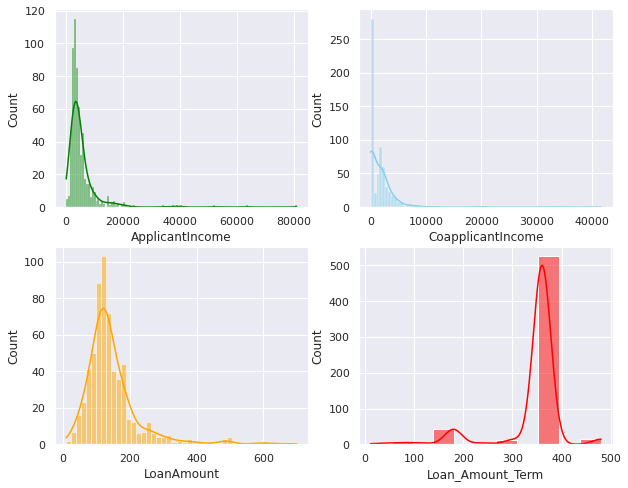

In [161]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loans, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loans, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loans, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=loans, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red')

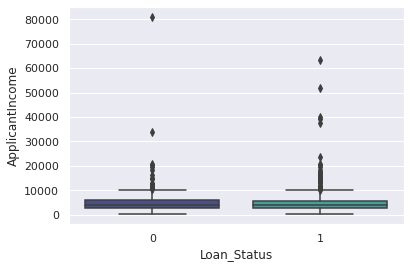

In [162]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=loans, palette="mako");

# Fit Models and transformation

In [163]:
# We don't need the Loan_ID field

loans = loans.drop(columns=['Loan_ID']) 

Target variables-Loan_Status

In [164]:
X = loans.drop(columns = ['Loan_Status'])
y = loans.Loan_Status 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [165]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


**LogisticRegression**

In [166]:
logistic_model = LogisticRegression(max_iter=1000,random_state=0)

In [167]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [170]:
cm = confusion_matrix(y_true=y,
                      y_pred=logistic_model.predict(X))
pd.DataFrame(cm, 
             index=logistic_model.classes_, 
             columns=logistic_model.classes_)

,0,1
0,83,109
1,8,414


In [171]:
print(classification_report(y_true=y,
                            y_pred=logistic_model.predict(X)))

              precision    recall  f1-score   support

           0       0.91      0.43      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614



In [12]:
numerical_cols = ['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History	']
categorical_cols = ['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area']

In [13]:
categorical_transformer = Pipeline(steps=
                                    [('imputer', SimpleImputer(strategy='most_frequent')),
                                     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

continuous_transformer = Pipeline(steps=
                                  [('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())])

boll_transformer = Pipeline(steps=
                            [('imputer', SimpleImputer(strategy='most_frequent'))]
                            )

preprocessor = ColumnTransformer(transformers=
                                  [('num', continuous_transformer, numerical_cols),
                                   ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# # Define params for each classifier type
# grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
#                     'clf__C': [0.001],
#                     'clf__solver': ['liblinear']}]

# grid_params_svm = [{'clf__kernel': ['linear', 'rbf'],
#                     'clf__C': [0.5, 1.5]}]

# grid_params_dt = [{'clf__max_depth': [30,20],
#                    'clf__min_samples_leaf': [10,3]}]

# grid_params_rf = [{'clf__max_depth': [30,20],
#                    'clf__min_samples_leaf': [10,3]}]                   

# cls_params = [(LogisticRegression(), grid_params_lr),
#               (SVC(), grid_params_svm),
#               (DecisionTreeClassifier(), grid_params_dt),
#                (RandomForestClassifier(), grid_params_rf)]
# for classifier, grid_params in cls_params:
#     pipeline = Pipeline(steps=
#                         [('preprocess', preprocessor),
#                           ('clf', classifier)])
#     model = model.fit(X_train, y_train)

#     y_test_pred, y_train_pred = model.predict(X_test), model.predict(X_train)
#     print("accuracy = ", (y_test_pred == y_test).sum()/len(y_test))